<!-- dom:TITLE: Solution to exercises, cable equation -->
# Solving the cable equation
<!-- dom:AUTHOR: Joakim Sundnes -->
<!-- Author: -->  
**Joakim Sundnes**

Date: **Jun 19, 2024**

## Part 1: The bistable equation

We want to solve the bistable equation on an interval $\Omega =[0,L]$:

$$
\begin{alignat*}{2}
v_t &= kv_{xx} + f(v) & \mbox{ for } & t> 0, 0 < x < L, \\
v_x &= 0 & \mbox{ for } &x = 0, x = L, \\
v & = v_0 &\mbox{ for } &t = 0, 0 < x = < L/10, \\
v & = 0 &\mbox{ for } &t = 0, L/10< x = < L,
\end{alignat*}
$$

with

$$
f(v) = Av(1-v)(v-\alpha) 
$$
and parameter values
$$
\begin{alignat*}{2}
k &= 1.0, A &= 1.0, \alpha &= 0.1 \\
L &= 100, v_0&= 0.3. &
\end{alignat*}
$$

(Note that we have used the compact notation $v_t = \partial
v/\partial t, v_{xx} = \partial^2v/\partial x^2$.)

### Explicit update scheme 
A standard finite difference approximation in space and time gives an explicit update formula for $v$:
$$
\begin{align*}
v_0^{j+1} &= v_0^j +\frac{k \Delta t}{\Delta x^2} 2 (v_1^j-v_0^j)
+\Delta t f(v_0^j) \\
v_i^{j+1}  &= v_i^j +\frac{k \Delta t}{\Delta x^2} (v_{i-1}^j-2v_i^j+v_{i+1}^j)
+\Delta t f(v_i^j), i = 1, \cdots, N-1 \\
v_N^{j+1} &= v_N^j +\frac{k \Delta t}{\Delta x^2} 2 (v_{N-1}^j-v_N^j)
+\Delta t f(v_N^j)
\end{align*}
$$

We will now implement this scheme in Python. First, we need to set some parameters and define arrays to store the solution:

In [20]:
%matplotlib inline

%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

k = 2.0
A = 1.0
alpha = 0.1
L =100

dx = 1;
dt = 0.1;

N = int(L/dx)

v = np.zeros(N+1)
v_prev = v
left =  int(N/10)
v_prev[:left] = 0.3
print(left)
print(v[:left])
print(v[left])
print(v)



SyntaxError: invalid syntax (4179437748.py, line 25)

### *Exercise 1: Bistable equation in Python*
Update the code below to implement the explicit update scheme above, and solve the bistable equation. 

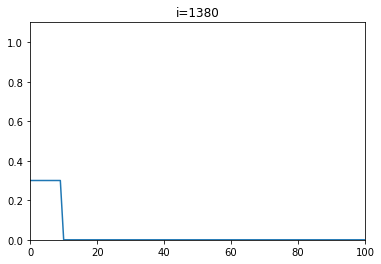

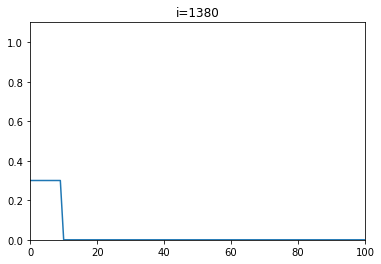

In [3]:
def f(v):
    return A*v*(1-v)*(v-alpha)


for i in range (1400):
    for j in range(1,N):
    	pass #replace with update formula v[j] = ...
     
    #add formulas for end points:
    #v[0] = ...
    #v[N] = ...
    if i%20==0:  #to avoid displaying every time step
        plt.clf()
        plt.axis([0, L, 0, 1.1])
        plt.plot(v)
        plt.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(plt.gcf())

### *Solution:*

Click below to expand the cell and see the solution. 

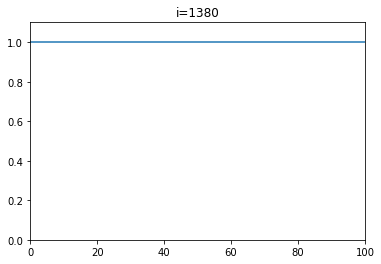

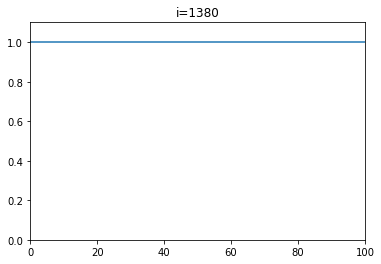

In [6]:
for i in range (1400):
    for j in range(1,N):
        I_ion = f(v_prev[j])  #reaction term
        diff = (k / dx**2) * (v_prev[j + 1]-2 * v_prev[j] + v_prev[j - 1]) #diffusion term
        v[j]  = v_prev[j] + dt * diff + dt * I_ion
    
    v[0] = v_prev[0] + dt * (k / dx ** 2) * 2 * (v_prev[1] - v_prev[0]) + dt * f(v_prev[0]) 
    v[N] = v_prev[N] + dt * (k / dx ** 2) * 2 * (v_prev[N-1] - v_prev[N]) + dt * f(v_prev[N]) 
    v_prev = v
    
    if i%20==0:  #to avoid displaying every time step
        plt.clf()
        plt.axis([0, L, 0, 1.1])
        plt.plot(v)
        plt.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(plt.gcf())

### Comments on the code
* Note that the solution is not saved, but overwritten for every step.

* Loops in Python are slow. It is possible to speed up the code by using vectorized NumPy operations to
  avoid the loop over the spatial domain. 

### *Exercise 2: vectorization (optional)*
Complete the code below to use a vectorized operation to update $v$, i.e., no loop over the spatial domain. 

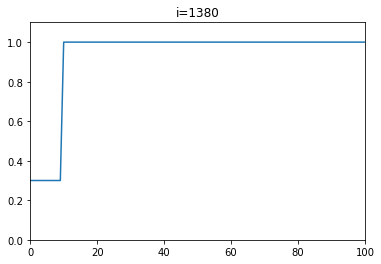

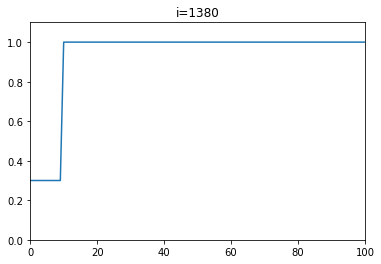

In [24]:

#reset v to initial condition:
v[:left] = 0.3

#introduce the appropriate arrays for slicing:
I = np.arange(1,N)
Ip = I+1
Im = I-1

for i in range (1400):
    """Insert your code here. The same formula as above, but 
    now vectorized, i.e. no loop over the array v"""

    if i%20==0:  #to avoid displaying every time step
        plt.clf()
        plt.axis([0, L, 0, 1.1])
        plt.plot(v)
        plt.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(plt.gcf())
    

### *Solution:*

Click below to expand the cell and see the solution. 

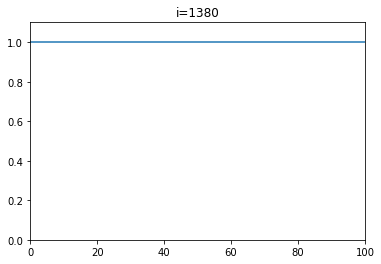

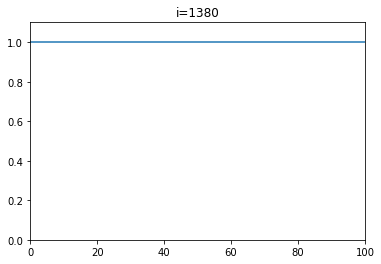

In [25]:
k = 2.0
A = 1.0
alpha = 0.1
L = 100

dx = 1;
dt = 0.1;

N = int(L/dx)

v = np.zeros(N+1)
left =  int(N/10)
v[:left] = 0.3

#introduce the appropriate arrays for slicing:
I = np.arange(1,N)
Ip = I+1
Im = I-1

for i in range (1400):
    I_ion = f(v) 
    #first add diffusion terms:
    v[I] = v[I] + dt * (k / dx ** 2) * (v[Ip] - 2 * v[I] + v[Im])
    v[0] = v[0] + dt * (k / dx ** 2) * 2 * (v[1] - v[0]) 
    v[N] = v[N] + dt * (k / dx ** 2) * 2 * (v[N-1] - v[N])  
    
    #then the reaction:
    v = v + dt * I_ion
    

    if i%20==0:  #to avoid displaying every time step
        plt.clf()
        plt.axis([0, L, 0, 1.1])
        plt.plot(v)
        plt.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(plt.gcf())

## Part 2: The FitzHugh-Nagumo (FHN) model
A small modification of the bistable equation gives the
FHN model:

$$
\begin{alignat*}{2}
v_t &= kv_{xx} + Av(1-v)(v-\alpha) -w & \mbox{ for } & t> 0, 0 < x < L, \\
w_t &= \epsilon (v-\gamma w) & \mbox{ for } & t> 0, 0 < x < L, \\
v_x &= 0 & \mbox{ for } &x = 0, x = L, \\
v & = v_0 &\mbox{ for } &t = 0, 0 < x = < L/10, \\
v & = 0 &\mbox{ for } &t = 0, L/10< x = < L,
\end{alignat*}
$$

The additional parameters are set to

$$
\epsilon = 0.005, \gamma = 2.0 .
$$

We will now extend the solver from above to solve the FHN model.

### *Exercise 3: Solving the FHN model*
Update the solver from above to solve the FHN model. You can either copy the relevant code lines into the empty cell below, or copy the entire cell from above and then modify it. 

In [7]:
# Insert your solution here (or create a new cell)

### *Solution:*

Click below to see the solution.

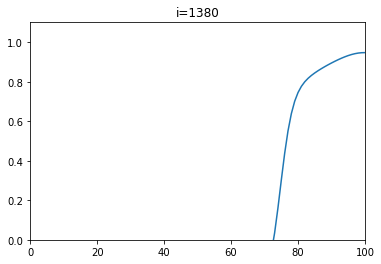

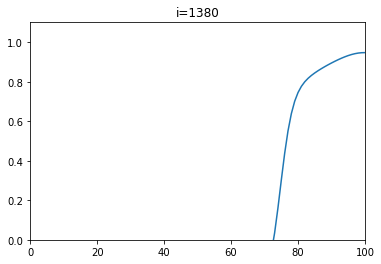

In [8]:
k = 2.0
A = 1.0
alpha = 0.1
L =100
eps = 0.005
gamma = 2.0

v = np.zeros(N+1)
w = np.zeros(N+1)
left = int(N/10)
v[:left] = 0.3
I = np.arange(1,N)
Ip = I+1
Im = I-1

for i in range(1400):
    I_ion = f(v) - w
    
    #first add the diffusion to v:
    v[I] = v[I] + dt*(k/dx**2)*(v[Ip]-2*v[I] +v[Im])
    v[0] = v[0] + dt * (k / dx ** 2) * 2 * (v[1] - v[0]) 
    v[N] = v[N] + dt * (k / dx ** 2) * 2 * (v[N-1] - v[N])  
    
    #then the reaction terms:
    v = v + dt * I_ion;
    w = w + dt * eps * (v - gamma * w)

    if i%20==0:  #to avoid displaying every time step
        plt.clf()
        plt.axis([0, L, 0, 1.1])
        plt.plot(v)
        plt.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(plt.gcf())


### *Exersise 4: Periodic boundary conditions*

We can model a simple reentrant circuit with periodic boundary
conditions:

$$
v(0) = v(L)
$$

This condition effectively creates a ring, by connecting the two ends of our cable to eachother. 

* Implement this condition in the FHN solver. You can either modify the code above directly or copy the cell here   and then modify.

* What happens? Why?

### *Solution:*
Click below to see the solution.

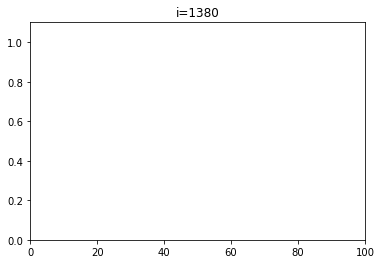

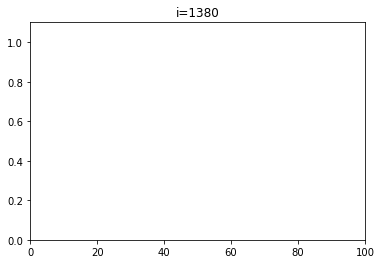

In [14]:
k = 2.0
A = 1.0
alpha = 0.1
L =100
eps = 0.005
gamma = 2.0

v = np.zeros(N+1)
w = np.zeros(N+1)

#mid = int(N/2)
#v[mid-10:mid+10] = 0.3
#w[:int(0.9*mid)] = 0.1

#left = int(N/10)
#v[:left] = 0.3
mid =  int(N/2);
v[mid-10:mid+10] = 0.3;
#w[:int(0.9*mid)] = 0.1

I = np.arange(N+1)
Ip = I+1
Ip[N] = 0
Im = I-1;
Im[0] = N

for i in range (1400):
    I_ion = A*v*(1-v)*(v-alpha) - w
    v[I] = v[I] + dt*(k/dx**2)*(v[Ip]-2*v[I] +v[Im])
    v = v + dt*I_ion;
    w = w + dt*eps*(v-gamma*w)

    if i%20==0:  #to avoid displaying every time step
        plt.clf()
        plt.axis([0, L, 0, 1.1])
        plt.plot(v)
        plt.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(plt.gcf())

### *Exercise 5: Simulating reentry*

Now, modify the initial condition in the code above to:

In [10]:
mid = int(N/2)
v[mid-2:mid+2] = 0.3

What happens?

Finally, add the line

In [11]:
w[:int(0.9*mid)] = 1

What happens? Why?

### *Solution:*

Click below to see the solution.

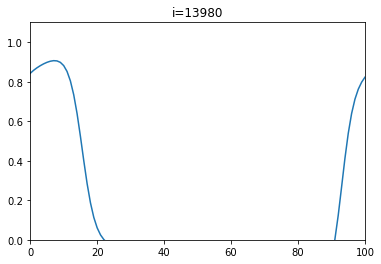

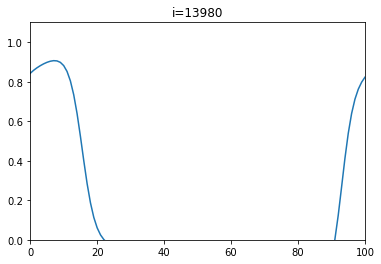

In [17]:
k = 2.0
A = 1.0
alpha = 0.1
L =100
eps = 0.005
gamma = 2.0

v = np.zeros(N+1)
w = np.zeros(N+1)

mid =  int(N/2);
v[mid-10:mid+10] = 0.3;
w[:int(0.9*mid)] = 0.1

I = np.arange(N+1)
Ip = I+1
Ip[N] = 0
Im = I-1;
Im[0] = N

for i in range (14000):
    I_ion = A*v*(1-v)*(v-alpha) -w
    v[I] = v[I] + dt*(k/dx**2)*(v[Ip]-2*v[I] +v[Im])
    v = v + dt*I_ion;
    w = w + dt*eps*(v-gamma*w)

    #v[0] = v[1]
    #v[N-1] = v[N-2]

    if i%20==0:  #to avoid displaying every time step
        plt.clf()
        plt.axis([0, L, 0, 1.1])
        plt.plot(v)
        plt.title('i=%d' % i)
        display.clear_output(wait=True)
        display.display(plt.gcf())